In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import dendro

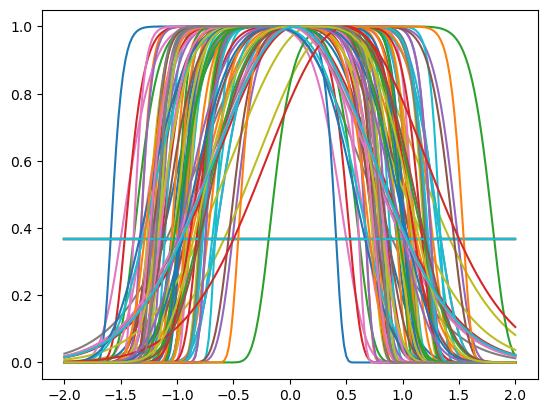

In [2]:
### Make some fake data. 100 total curves:
x = np.linspace(-2,2,201)
np.random.seed(12345)
dat = np.exp(-(x-np.random.randn(100,1)/4)**(2*np.floor(10*np.random.random([100,1]))))
plt.plot(x,dat.T);

## First, let's look at the 'default' dendrogram and the reconstructed signals that come from it

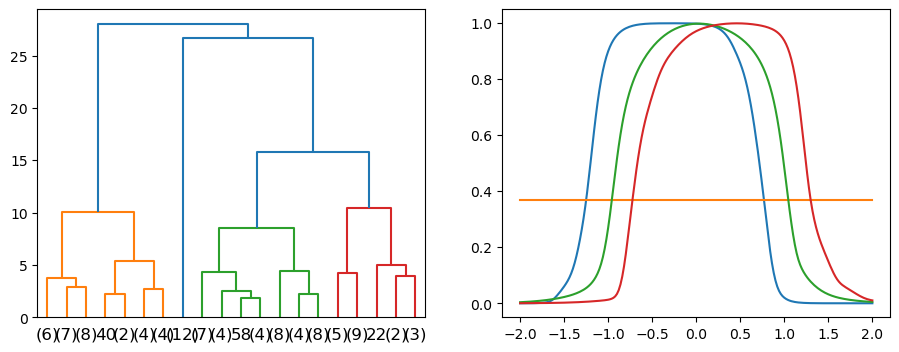

In [3]:
### Try assigning n=4 clusters
n = 4

plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
Z = shc.linkage(dat, method = 'ward')
dend = shc.dendrogram(Z, 
            orientation='top', 
            truncate_mode='lastp',
            color_threshold=12,
            p=20)

plt.subplot(1,2,2)
clus = shc.fcluster(Z,n,criterion='maxclust')-1  ### -1 as default counting starts at 1. Impractical in python

for i in range(n):
    plt.plot(x,dat[clus==i].mean(axis=0))

## This Dendrogram and reconstructed data aren't great, as:
1. The labels on the x axis have limited meaning
2. No indication of where the cutoff is visually 
3. Speaking of colours -- the colours from the dendrogram don't match the ccluster means (The horizontal line cluster should be blue, not orange)
4. You have to manually pick both the number of clusters and corresponding cutoff

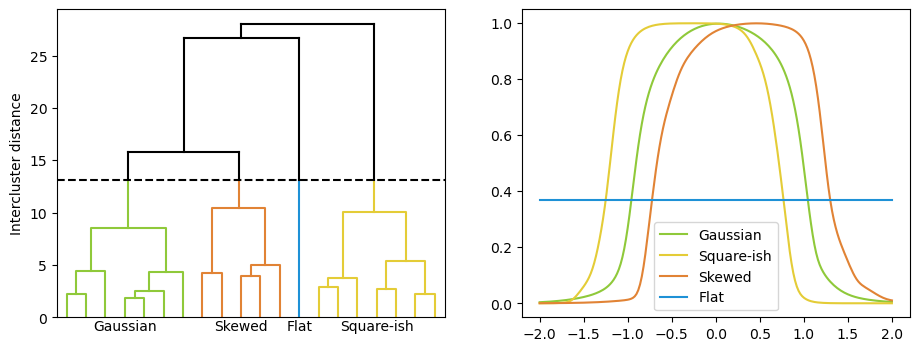

In [4]:
n = 4
colors = ['#8FC93A','#E4CC37','#E18335','#1E91D6']
labels = ['Gaussian','Square-ish','Skewed','Flat']


fig, ax = plt.subplots(1,2,figsize=(11,4))


ax[0], clus = dendro.improved_dendrogram(ax[0], dat, n, c_list = colors, cluster_names = labels)

for i in range(n):
    ax[1].plot(x,dat[clus==i].mean(axis=0),c=colors[i])
ax[1].legend(labels)

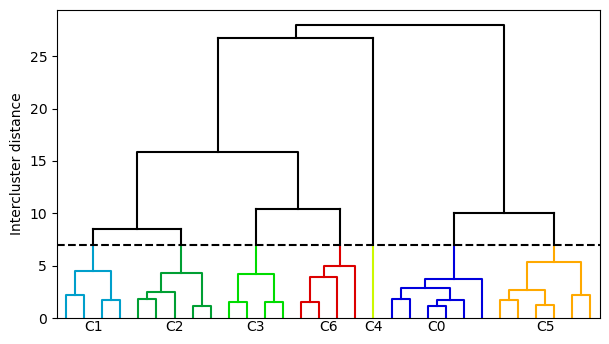

In [5]:
### Another example with more clusters and no reconstruction

n = 7
colors = plt.cm.nipy_spectral(np.linspace(0.2,0.9,n))

fig, ax = plt.subplots(figsize=(7,4))


ax, clus = dendro.improved_dendrogram(ax, dat, n, p=30, c_list = colors)